In [4]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

base_path = 'output/clai/'

In [5]:
def readfile(file, run=""):
    path = base_path + run + '/' + file
    with open(path, 'r') as f:
        return f.read()

def get_runs():
    runs = []
    for i, folder in enumerate(os.listdir(base_path)):

        conf = eval(readfile('conf.txt', folder))
        conf['name'] = folder
        runs.append(conf)
    return runs
    


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [3]:
len(runs)

NameError: name 'runs' is not defined

In [5]:
def has_constraint(run, constr):
    for k, v in constr.items():
        if k not in run.keys():
            continue
        if run[k] != v:
            return False
    return True

def avg_under(constr):
    ind = [i for i, run in enumerate(runs) 
               if has_constraint(run, constr)] #and run['epochs']==len(avg_blues[i])]
    print(ind)
    blues_constrained = np.mean([avg_blues[i] for i in ind], axis=0)
    return blues_constrained



[]
[]
[]


/opt/conda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


ValueError: x and y must have same first dimension, but have shapes (8,) and (1,)

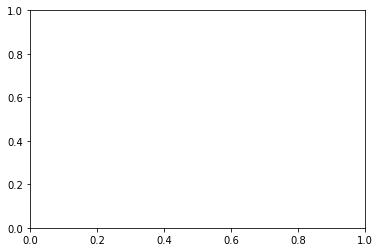

In [52]:
txt = avg_under({'encoding': 'text'})
LBL = avg_under({'encoding': 'LBL', 'batch_size': 4, 'epochs':8})
blocked = avg_under({'encoding': 'blocked', 'epochs':8, 'model':'gpt2', 'max_block':500})

plt.plot(range(1,9), LBL, label="LBL (batchsize 4)")
plt.plot(range(1,9), txt, label="Default GPT2 encoding")
plt.plot(range(1,9), blocked, label="Blocked encoding")
plt.legend()

4
4
4


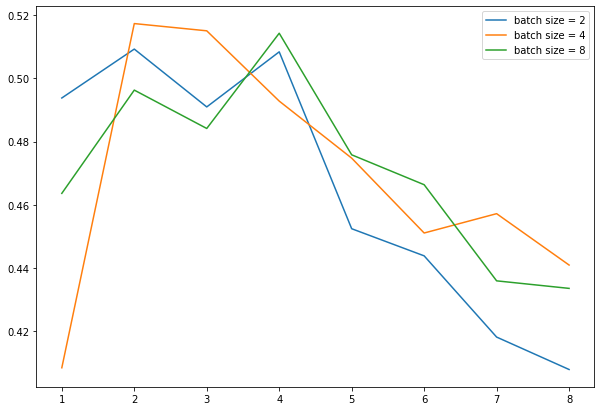

In [50]:
LBL4 = avg_under({'encoding': 'LBL', 'batch_size': 4, 'epochs':8})
LBL2 = avg_under({'encoding': 'LBL', 'batch_size': 2, 'epochs':8})
LBL8 = avg_under({'encoding': 'LBL', 'batch_size': 8, 'epochs':8})

plt.plot(range(1,9), LBL2, label='batch size = 2')
plt.plot(range(1,9), LBL4, label='batch size = 4')
plt.plot(range(1,9), LBL8, label='batch size = 8')
plt.legend()

4
1


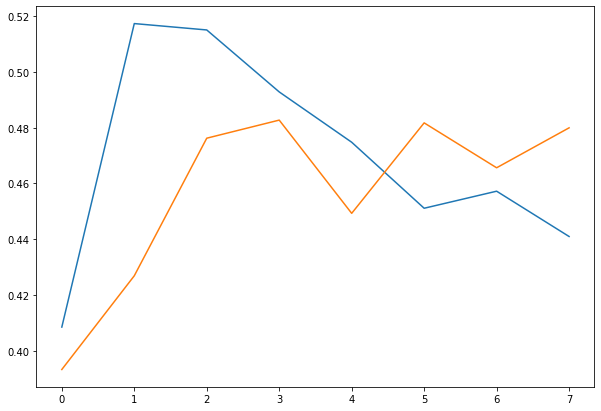

In [51]:
LBL = avg_under({'encoding': 'LBL', 'batch_size': 4, 'epochs':8})
INT = avg_under({'encoding': 'inter_LBL'})

plt.plot(LBL)
plt.plot(INT)


4
4


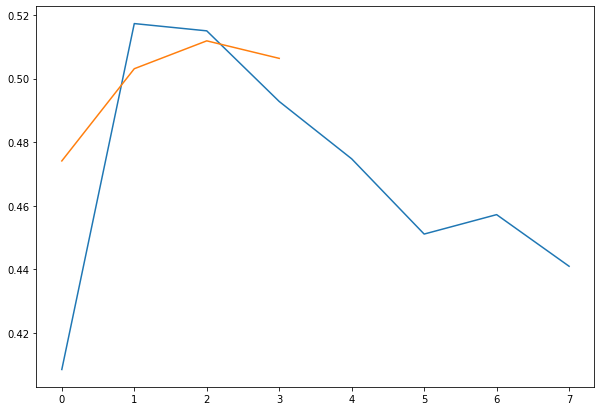

In [83]:
LBL_long = avg_under({'encoding': 'LBL', 'batch_size': 4, 'epochs':8})
LBL_short = avg_under({'encoding': 'LBL', 'batch_size': 4, 'epochs':4})

plt.plot(LBL_long)
plt.plot(LBL_short)

4
1


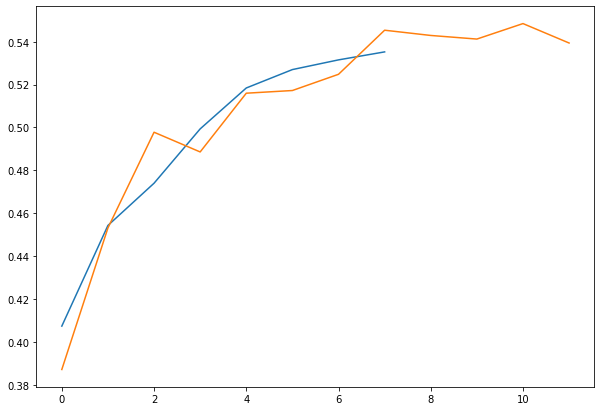

In [84]:
blocked_long = avg_under({'encoding': 'blocked', 'epochs':8, 'model':'gpt2', 'max_block':500 })
blocked_short = avg_under({'encoding': 'blocked', 'epochs':12, 'model':'gpt2', 'max_block':500})

plt.plot(blocked_long)
plt.plot(blocked_short)

3
4
2


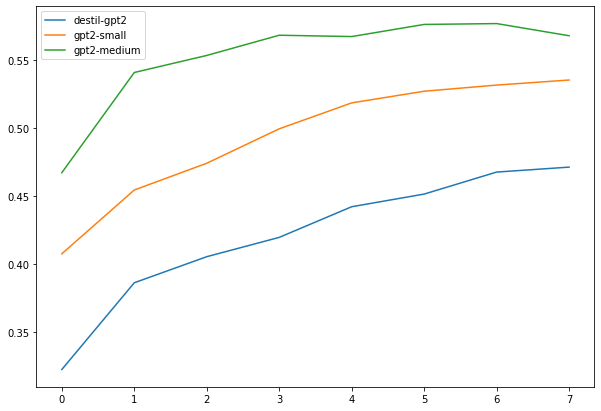

In [85]:
xs = avg_under({'encoding': 'blocked', 'epochs':8, 'model':'distilgpt2', 'max_block':500 })
sm = avg_under({'encoding': 'blocked', 'epochs':8, 'model':'gpt2', 'max_block':500 })
med = avg_under({'encoding': 'blocked', 'epochs':8, 'model':'gpt2-medium', 'max_block':500 })


plt.plot(xs, label='destil-gpt2')
plt.plot(sm, label='gpt2-small')
plt.plot(med, label='gpt2-medium')
plt.legend()

[]
[]
[]
[]
[]


/opt/conda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


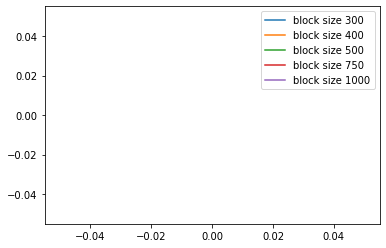

In [37]:
blocked_xsb = avg_under({'encoding': 'blocked', 'epochs':8, 'model':'gpt2', 'max_block':300, 'batch_size':1})
blocked_sb = avg_under({'encoding': 'blocked', 'epochs':8, 'model':'gpt2', 'max_block':400, 'batch_size':1, 'random_init':False})
blocked_def = avg_under({'encoding': 'blocked', 'epochs':8, 'model':'gpt2', 'max_block':500, 'batch_size':1})
blocked_lb = avg_under({'encoding': 'blocked', 'epochs':8, 'model':'gpt2', 'max_block':750, 'batch_size':1 })
blocked_xlb = avg_under({'encoding': 'blocked', 'epochs':8, 'model':'gpt2', 'max_block':1000, 'batch_size':1})


plt.plot(blocked_xsb, label='block size 300')
plt.plot(blocked_sb, label='block size 400')
plt.plot(blocked_def, label='block size 500')
plt.plot(blocked_lb, label='block size 750')
plt.plot(blocked_xlb, label='block size 1000')

plt.legend()

4
4


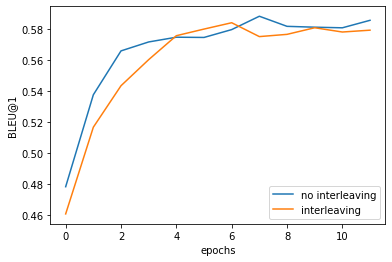

In [7]:
med = avg_under({'encoding': 'blocked', 'epochs':12, 'model':'gpt2-medium', 'max_block':400, 'val_n':200 })
med_inter = avg_under({'encoding': 'inter_blocked', 'epochs':12, 'model':'gpt2-medium', 'max_block':400 , 'val_n':200})

plt.plot(med, label="no interleaving")
plt.plot(med_inter, label="interleaving")
plt.legend()
plt.xlabel("epochs")
plt.ylabel("BLEU@1")
plt.savefig("interleaving")

1
2


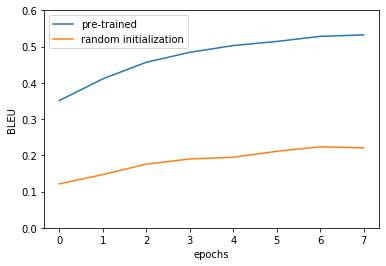

In [10]:
med = avg_under({'encoding': 'blocked', 'epochs':8, 'model':'gpt2', 'max_block':400, 'val_n':None, 'random_init':False })
med_inter = avg_under({'encoding': 'blocked', 'epochs':8, 'model':'gpt2', 'max_block':400 , 'val_n':None, 'random_init':True})

plt.plot(med, label="pre-trained")
plt.ylim([0,0.6])
plt.xlabel("epochs")
plt.ylabel("BLEU")
plt.plot(med_inter, label="random initialization")
plt.legend()
plt.savefig("rando")

In [77]:
print("BEST PERFORMANCE: %.02f%% BLUE@1"%(100*np.max([np.max(x) for x in avg_blues])))

BEST PERFORMANCE: 60.51% BLUE@1


In [123]:
[x for x in runs if has_constraint(x, {'model':'gpt2'})]

[{'sep1': 'english:',
  'sep2': 'bash:',
  'encoding': 'blocked',
  'max_line': 170,
  'max_block': 500,
  'data_path': 'data/nl2bash/',
  'eos': '<|endoftext|>',
  'model': 'gpt2-medium',
  'device': 'cuda',
  'val_n': 200,
  'epochs': 8,
  'batch_size': 1,
  'grad_acc': 1,
  'out_path': 'output/nl2bash/',
  'beams': 2,
  'max_gen': 200,
  'name': '07-29_20:34:55'},
 {'sep1': 'english:',
  'sep2': 'bash:',
  'encoding': 'inter_blocked',
  'max_line': 170,
  'max_block': 400,
  'data_path': 'data/nl2bash/',
  'eos': '<|endoftext|>',
  'model': 'gpt2-medium',
  'device': 'cuda',
  'val_n': 200,
  'epochs': 8,
  'batch_size': 1,
  'grad_acc': 1,
  'out_path': 'output/nl2bash/',
  'beams': 2,
  'max_gen': 200,
  'add_tokens': False,
  'name': '07-30_14:19:08'},
 {'sep1': 'english:',
  'sep2': 'bash:',
  'encoding': 'blocked',
  'max_line': 170,
  'max_block': 350,
  'data_path': 'data/nl2bash/',
  'eos': '<|endoftext|>',
  'model': 'gpt2-medium',
  'device': 'cuda',
  'val_n': 200,
  'epo

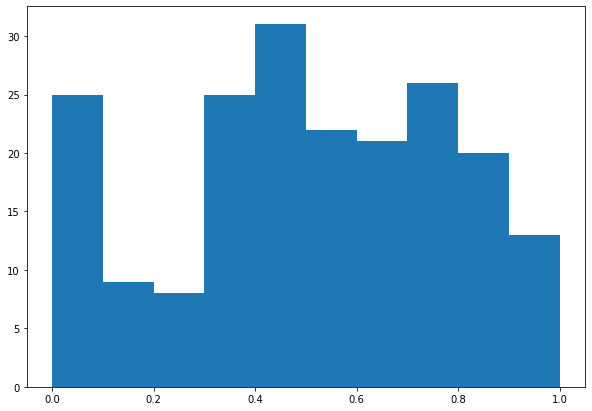

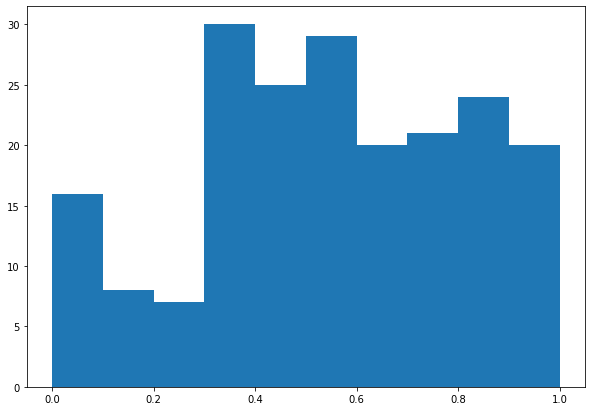

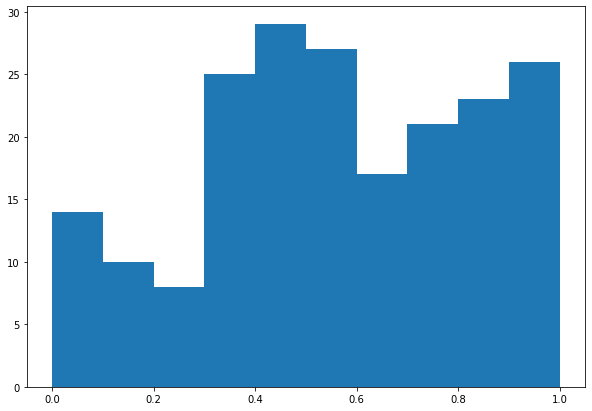

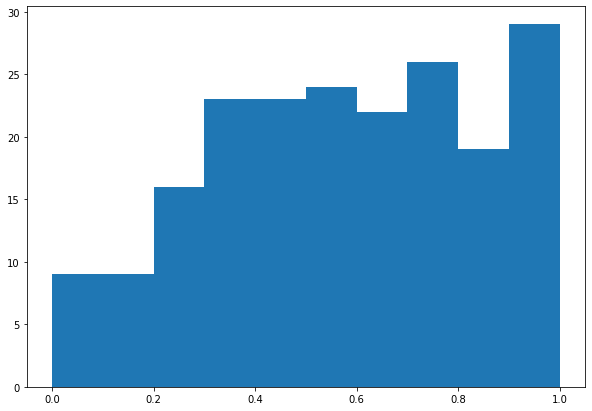

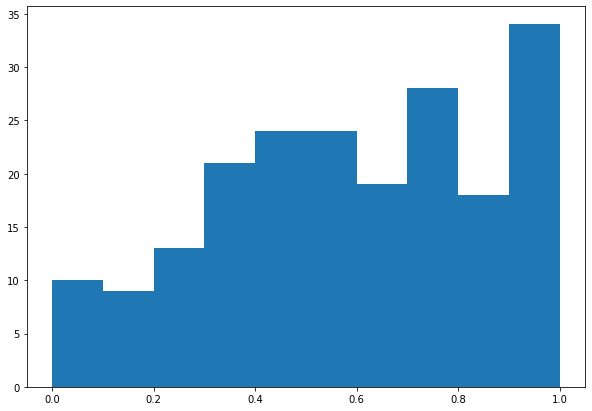

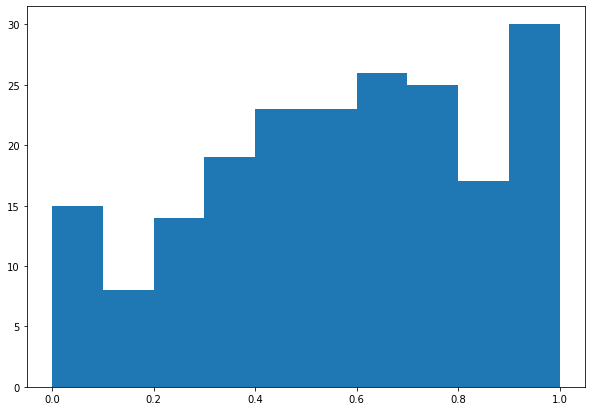

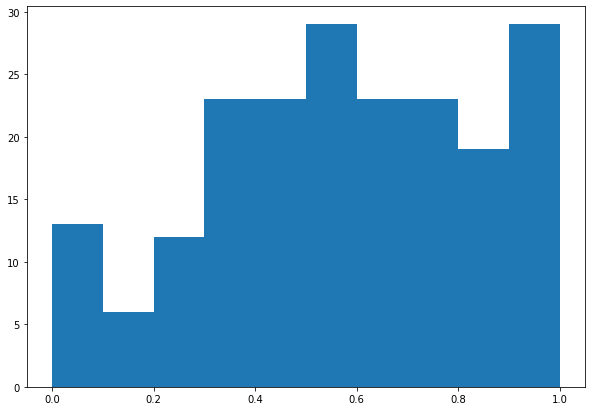

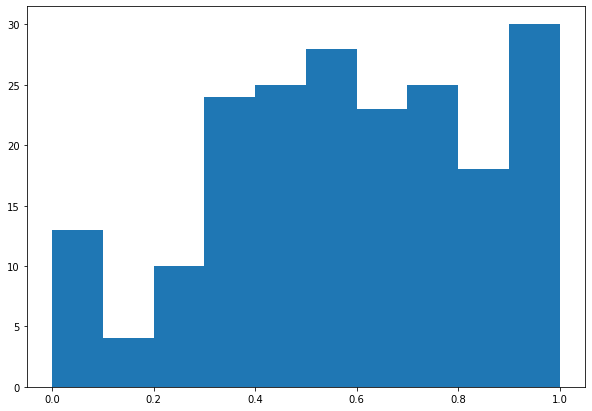

In [134]:
blue = blues[best_model]
for entry in blue:
    plt.hist(entry)
    plt.show()

In [7]:
best_model = np.argmax([np.max(x) for x in avg_blues])
print(runs[best_model])
print(np.max([x[-1] for x in avg_blues]))
best_pred = readfile("pred.txt", runs[best_model]['name'])
best_pred = [eval(x) for x in best_pred.split('\n') if x][-1]


{'sep1': 'english:', 'sep2': 'bash:', 'encoding': 'inter_blocked', 'max_line': 170, 'max_block': 400, 'data_path': 'data/nl2bash/', 'eos': '<|endoftext|>', 'model': 'gpt2-medium', 'device': 'cuda', 'val_n': 200, 'epochs': 12, 'batch_size': 1, 'grad_acc': 1, 'out_path': 'output/nl2bash/', 'beams': 2, 'max_gen': 200, 'add_tokens': False, 'name': '07-31_14:57:12'}
0.590918285282081


In [95]:
for i in best_pred:
    print(i)

brew link bash_completion
nl -n ln -s "^M${LOGFILE}>$"
find . -type f -mtime -1 -name "*.jpg" -o -mtime -1 -name "*.png"
yes | cp -av --target-directory=/tmp *
tail -f file | perl -ne 'print "| COUNTRY" | perl -ne 'print "| $sort(sort(sort(sort(sort(sort(sort(sort(sort(sort(sort(sort(sort(sort(sort(sort(sort(sort(sort(sort(sort(sort(sort(sort(sort(sort(sort(sort(sort(sort(sort(sort(sort(sort(sort(sort(sort(sort(null))))))))))))))))))'
find . -type f -exec ./group.sed {} \;
rsync -avz --delete-excluded /media/Incoming/music/ server:/media/10001/music/
rsync -avz -e 'ssh user@remoteserver.com:/source' /dstfolder/
rsync -av ssh source destination
find . -type f ! -name ".*" -exec cpio -av {} arch.cpio \;
rsync -avzp me@some/path:/some/path
rsync -avR directory . /. /server2::sharename/B
rsync -av --exclude=./src/* --exclude=.. /path/to/destination
find ~/tmp/ -mtime -1 -print0 | xargs -0 du -sh
checksum=$(cat /etc/localtime | cut -d' ' -f1)
find path/to/source/Directory -type f -exec md5s

In [5]:
i = 1
print(np.max(avg_blues[-i]))
runs[-i]

0.5802083406509485


{'sep1': 'english:',
 'sep2': 'bash:',
 'encoding': 'inter_blocked',
 'max_line': 170,
 'max_block': 400,
 'data_path': 'data/nl2bash/',
 'eos': '<|endoftext|>',
 'model': 'gpt2-medium',
 'device': 'cuda',
 'val_n': None,
 'epochs': 13,
 'batch_size': 1,
 'grad_acc': 1,
 'out_path': 'output/nl2bash/',
 'beams': 2,
 'max_gen': 200,
 'add_tokens': False,
 'random_init': False,
 'name': '08-25_17:51:19'}

In [18]:
real_bl = {
    '08-22_11:00:22':0.5632782557233857, # no inter
    '08-21_18:08:02':0.578280246815168, #inter
    '08-22_08:20:38':0.5691481770751113,
    '08-21_15:21:59':0.5697596205525152,
    
}

In [32]:
for i, run in enumerate(runs):
    name = run['name']
    if not run['name'] in real_bl:
        continue
    print(name, run['encoding'])
    print(np.max(avg_blues[i]))
    print(real_bl[name]-np.max(avg_blues[i]))
    print(real_bl[name])

08-21_15:21:59 blocked
0.5905215378823507
-0.020761917329835566
0.5697596205525152
08-21_18:08:02 inter_blocked
0.5898884809456504
-0.011608234130482398
0.578280246815168
08-22_08:20:38 inter_blocked
0.5799053700586402
-0.01075719298352884
0.5691481770751113
08-22_11:00:22 blocked
0.6014251999526653
-0.038146944229279556
0.5632782557233857


In [28]:
for i in [46, 47]:
    print(avg_blues[i][-1])
    print(runs[i]['name'])

0.5513700118927184
07-31_09:06:18
0.5414119457942688
07-31_09:36:27


[4]
[0, 3]
[1]
[2]


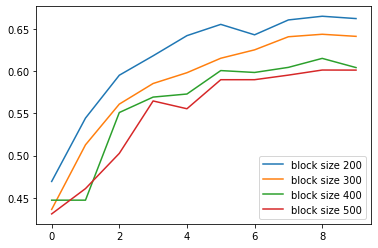

In [67]:
blocked_xxsb = avg_under({'encoding': 'blocked', 'epochs':10, 'model':'gpt2', 'max_block':200, 'batch_size':1})
blocked_xsb = avg_under({'encoding': 'blocked', 'epochs':10, 'model':'gpt2', 'max_block':300, 'batch_size':1})
blocked_sb = avg_under({'encoding': 'blocked', 'epochs':10, 'model':'gpt2', 'max_block':400, 'batch_size':1, 'random_init':False})
blocked_def = avg_under({'encoding': 'blocked', 'epochs':10, 'model':'gpt2', 'max_block':500, 'batch_size':1})


plt.plot(blocked_xxsb, label='block size 200')
plt.plot(blocked_xsb, label='block size 300')
plt.plot(blocked_sb, label='block size 400')
plt.plot(blocked_def, label='block size 500')

plt.legend()

[9]
[6]
[10, 11]
[12]
0.6870092765524107
0.6713596824359215
0.6950391544001128
0.7098442481309079


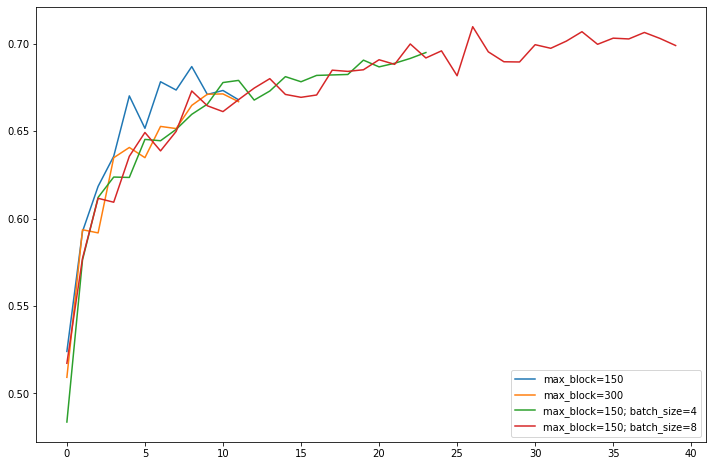

In [58]:
med_xxsb = avg_under({'encoding': 'blocked', 'epochs':12, 'model':'gpt2-medium', 'max_block':150, 'batch_size':1})
#med_xsb = avg_under({'encoding': 'blocked', 'epochs':12, 'model':'gpt2-medium', 'max_block':200, 'batch_size':1})
med_sb = avg_under({'encoding': 'blocked', 'epochs':12, 'model':'gpt2-medium', 'max_block':300, 'batch_size':1})
med_long = avg_under({'encoding': 'blocked', 'epochs':24, 'model':'gpt2-medium', 'max_block':150, 'batch_size':4})
med_grad = avg_under({'encoding': 'blocked', 'model':'gpt2-medium', 'max_block':150, 'batch_size':4, 'grad_acc':2})

print(np.max(med_xxsb))
print(np.max(med_sb))
print(np.max(med_long))
print(np.max(med_grad))

plt.figure(figsize=(12,8))
plt.plot(med_xxsb, label='max_block=150')
plt.plot(med_sb, label='max_block=300')
plt.plot(med_long, label='max_block=150; batch_size=4')
plt.plot(med_grad, label='max_block=150; batch_size=8')
plt.legend()